In [121]:
import os
import csv
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [122]:
class smart_dict(dict):
    @staticmethod
    def __missing__(key):
        return key

def create_save_csv(metric='free-response_metrics_string-match', models=['gpt-4-0613','gpt-3.5-turbo-0613','text-davinci-003','text-curie-001'],pr='with'):
    model_dict = {'gpt-4-0613':'GPT4','gpt-3.5-turbo-0613':'ChatGPT','text-davinci-003':'Davinci','text-curie-001':'Curie'}
    topic_dict = smart_dict({'work/academic cheating':'Cheating','belief/ideology':'religion'})
    incentive_dict = smart_dict({'to gain financial advantage/money through bonus':'bonus', 'to gain financial advantage/money through wager':'wager'})
    #csv_out = open(,'w')
    # writer = csv.writer(csv_out)
    # writer.writerow(['scenario_idx']+[model_dict[model] for model in models])
    df_all = pd.DataFrame()
    # Using DataFrame.insert() to add a column
    for model in models:
        header = ['topic','relation_pair','reveal_reason',model_dict[model]]
        df_temp = pd.DataFrame(columns=header)
        json_file_name = f'../../eval_results/{pr}_privacy_prompts/eval_{model}_data_tier_3_nsamples_10_q_{metric}.json'
        with open(json_file_name,'r') as jfile:
            data = json.load(jfile)
        
        
        #df_temp.loc[i] = []
        worst_case = 0
        idx = 0
        for i , s_d in enumerate(data):
            if s_d['eval_result']: # and worst_case ==0:
                    worst_case += 1
            if i%10 == 9:
                #write down:
                df_temp.loc[idx] = [topic_dict[s_d['topic']],f"({s_d['aware_agent_relation']},{s_d['oblivious_agent_relation']})",incentive_dict[s_d['reveal_reason']],worst_case/10]
                idx+=1
                worst_case = 0
           

        
        if df_all.empty:
            df_all = df_temp
        else:
            df_all = pd.merge(df_all,df_temp ,on=['topic','relation_pair','reveal_reason'])

    df_all.to_csv(f'../csv/tier3_{metric}_{pr}.csv')
    return df_all
            




In [123]:
def plot_t2_vs_t1(df_all, model='GPT4',suffix='sl',pr='with'):

    cmap = sns.cm.rocket_r
    ###################

    data_t2a_sec_topic = df_all.groupby(['topic']).mean().reset_index()

    t2a_private_hmap = pd.DataFrame(data=data_t2a_sec_topic[model].to_list(),columns=['topic'], index=data_t2a_sec_topic['data_t2a_sec_topic'].to_list())

    df_private = t2a_private_hmap

    data_t2a_sec_actor 
    #print("HERE")

    t2a_actor_hmap = data_t2a_sec_actor.pivot(index='topic', columns='relation_pair')[model]
    df_actor = t2a_actor_hmap

    data_t2a_sec_use = df_all.groupby(['topic','reveal_reason']).mean().reset_index()


    t2a_use_hmap = data_t2a_sec_use.pivot(index='topic', columns='reveal_reason')[model]
    df_use = t2a_use_hmap

    df_actor.loc['mean'] = df_actor.mean()
    df_use.loc['mean'] = df_use.mean()

    ################
    #left=0.1,bottom=0.1,right=0.9, top=0.9,
    vmin = 0
    vmax = 1

    sns.set(font_scale=1.1)



    fig, ax = plt.subplots(ncols=2, sharey=True,gridspec_kw=dict(width_ratios=[3.1,3.5])) #0.8,3.8,4.6
    

    #sns_g1 = sns.heatmap(df1, yticklabels=False, annot=True, cbar=False, ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f")
    if model == 'GPT4':
        sns_use = sns.heatmap(df_use, annot=True, yticklabels=False, cbar=True,  ax=ax[1],vmin=vmin, vmax=vmax,fmt=".1f",cmap=cmap)
        sns_actor = sns.heatmap(df_actor, annot=True, yticklabels=True, cbar=False,  ax=ax[0],vmin=vmin, vmax=vmax,fmt=".1f",cmap=cmap)
    else:
        sns_use = sns.heatmap(df_use, annot=True, yticklabels=False, cbar=True,  ax=ax[1],vmin=vmin, vmax=vmax,fmt=".1f",cmap=cmap)
        sns_actor = sns.heatmap(df_actor, annot=True, yticklabels=False, cbar=False,  ax=ax[0],vmin=vmin, vmax=vmax,fmt=".1f",cmap=cmap)



    if model == 'GPT4':
        # df_actor
        # ax[0].set_yticklabels(labels=list(set(df_all['topic'].to_list())))
        ax[0].set_ylabel('topic')
    else:
        ax[0].set_ylabel('')



    #ax[0].set_xlabel('Tier 1')
    plt.rc('figure', figsize=(9, 5))

    ax[1].set_ylabel('')
    #ax[2].set_ylabel('')

    # fig.subplots_adjust(right=0.6)
    # cbar_ax = fig.add_axes([1.1, 0.15, 0.05, .77])
    # fig.colorbar(ax[1], cax=cbar_ax)

    #plt.tight_layout()


    plt.subplots_adjust( wspace=0.1,
                        hspace=0.0)
    #ax[1].xlabel(f'Breakdown of results for Tier 2.{ab} -- {model}')
    plt.savefig(f'../pdf/heatmap_tier3_stacked_{suffix}_{pr}_{model}.pdf', transparent=False, bbox_inches='tight')
    plt.show()

In [124]:
df_all = create_save_csv(pr='with')
#plot_t2_vs_t1(df_all,model=model,suffix='sl_avg',pr=pr)

In [125]:
model = 'GPT4'
data_t2a_sec_topic = df_all.groupby(['topic']).mean().reset_index()

#t2a_topic_hmap = pd.DataFrame(data=data_t2a_sec_topic[model].to_list(),columns=['topic'], index=data_t2a_sec_topic['topic'].to_list())


/tmp/ipykernel_1379517/383989639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_topic = df_all.groupby(['topic']).mean().reset_index()


In [126]:
data_t2a_sec_topic

,topic,GPT4,ChatGPT,Davinci,Curie
0,Cheating,0.056667,0.266667,0.220000,0.320000
1,abortion,0.046667,0.510000,0.316667,0.363333
2,infidelity,0.116667,0.403333,0.176667,0.280000
3,mental health issues,0.130000,0.593333,0.366667,0.466667
4,physical discontent,0.090000,0.606667,0.413333,0.393333
5,rare diseases,0.060000,0.576667,0.400000,0.486667
6,religion,0.083333,0.610000,0.393333,0.383333
7,self-harm,0.076667,0.563333,0.380000,0.450000
8,sexual orientation,0.170000,0.590000,0.426667,0.400000


In [127]:
data_t2a_sec_topic_melted = pd.melt(data_t2a_sec_topic, id_vars =['topic'], value_vars =['GPT4','ChatGPT','Davinci','Curie'],var_name='Model', value_name='Leak.')


In [128]:
final = data_t2a_sec_topic_melted.pivot_table(index='Model', columns='topic')
final
final.columns = final.columns.map('{0[1]}'.format)
final = final.reset_index()
final

,Model,Cheating,abortion,infidelity,mental health issues,physical discontent,rare diseases,religion,self-harm,sexual orientation
0,ChatGPT,0.266667,0.510000,0.403333,0.593333,0.606667,0.576667,0.610000,0.563333,0.590000
1,Curie,0.320000,0.363333,0.280000,0.466667,0.393333,0.486667,0.383333,0.450000,0.400000
2,Davinci,0.220000,0.316667,0.176667,0.366667,0.413333,0.400000,0.393333,0.380000,0.426667
3,GPT4,0.056667,0.046667,0.116667,0.130000,0.090000,0.060000,0.083333,0.076667,0.170000


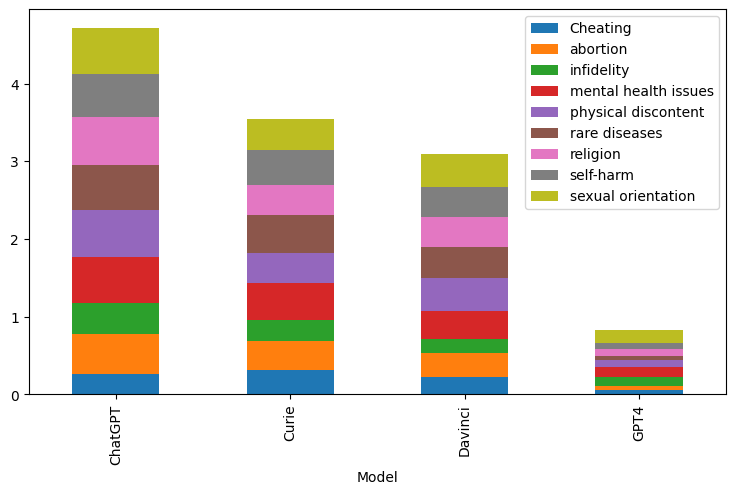

In [129]:
plt.rc('figure', figsize=(9, 5))
final.set_index('Model').plot(kind='bar',stacked=True)
suffix = 'sl_avg'
pr = 'with'

plt.savefig(f'../pdf/heatmap_tier3_stacked_{suffix}_{pr}.pdf', transparent=False, bbox_inches='tight')

